In [210]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np

In [129]:
 #Importing dataset
df=pd.read_csv('Base_Problem_DataSet.csv')

C:\Users\jithu\AppData\Local\Temp\ipykernel_4708\2867678403.py:1: DtypeWarning: Columns (1,7,8,15,16,17,18,19,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Base_Problem_DataSet.csv')


In [130]:
#Descriptive Analysis
df.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [131]:
#Descriptive Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

In [132]:
#Data pre-processing
df.drop('Rating_Origin_3', axis=1, inplace=True)
df.drop('Rating_Origin_1', axis=1, inplace=True)
df.drop('Customer_Vocation', axis=1, inplace=True)
df.drop('Private_Dwelling_Duration', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)

In [133]:
#Descriptive Analysis
df.astype('category').describe()

,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,...,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
count,118249,118275.0,118232.0,118221.0,118195.0,118218.0,118224.0,117044,118155,118211,...,119428.0,118193.0,121856,121856,118247,116170.000000,59928.0000,118192.0,103316.0,121856
unique,1516,2.0,2.0,2.0,2.0,14.0,6816.0,16680,8,5,...,7.0,24.0,2,2,58,67016.000000,1882.0000,3590.0,21.0,2
top,13500,0.0,0.0,0.0,1.0,0.0,45000.0,900,Service,Secondary,...,2.0,10.0,Yes,Yes,Business Entity Type 3,0.285898,0.0825,0.0,0.0,0
freq,11908,77724.0,78948.0,59208.0,81798.0,82834.0,2513.0,1885,61028,83911,...,20907.0,14465.0,112454,100015,26279,269.000000,2648.0000,14555.0,28003.0,112011


In [134]:
#Descriptive Analysis
df.describe()

,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
count,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,0.342854,0.332262,0.499175,0.692060,0.417779,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.518625,0.117428,962.106056,1.891082,0.080792
std,0.474665,0.471026,0.500001,0.461644,0.728802,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.740248,0.107974,827.976726,1.861921,0.272517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.390164,0.057700,272.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,100.000000,1.000000,4185.000000,22.000000,1.000000


In [135]:
#Descriptive Analysis
df.isnull().sum()

Patron_Salary                                  3607
Automobile_Possession                          3581
Two-Wheeler_Ownership                          3624
Ongoing_Borrowing                              3635
Residence_Proprietorship                       3661
Offspring_Number                               3638
Loan_Capital                                   3632
Borrowing_Periodic_Payment                     4812
Customer_Revenue_Category                      3701
Patron_Academic_Qualification                  3645
Customer_Conjugal_State                        3473
Patron_Sex                                     2413
Borrowing_Agreement_Category                   3651
Customer_Living_Arrangement                    3687
Population_Fraction_by_Region                  4857
Elderliness_in_Days                            3600
Work_Duration_in_Days                          3649
Enlistment_Period_in_Days                      3614
Identity_Age_in_Days                           5968
Cellphone_Ma

In [136]:
#Data pre-processing
df['Patron_Salary'] = df['Patron_Salary'].replace("$",'')
df['Patron_Salary']=df['Patron_Salary'].replace(r'^\s*$', np.nan, regex=True)
df['Patron_Salary'] = df['Patron_Salary'].astype(str).astype(float)
#df["Patron_Salary"].replace(to_replace=0,value=df["Patron_Salary"].mean(),inplace=True)
df["Patron_Salary"].fillna(round(df["Patron_Salary"].mean(),2),inplace=True)


In [138]:
#Data pre-processing
missing_values = df['Automobile_Possession'].isnull()
df.loc[missing_values, 'Automobile_Possession'] = 0
df['Automobile_Possession'] = df['Automobile_Possession'].astype(int)

In [142]:
#Data pre-processing
missing_values = df['Two-Wheeler_Ownership'].isnull()
df.loc[missing_values, 'Two-Wheeler_Ownership'] = 0
df['Two-Wheeler_Ownership'] = df['Two-Wheeler_Ownership'].astype(int)

In [144]:
#Data pre-processing
missing_values = df['Ongoing_Borrowing'].isnull()
df.loc[missing_values, 'Ongoing_Borrowing'] = 0
df['Ongoing_Borrowing'] = df['Ongoing_Borrowing'].astype(int)

In [146]:
#Data pre-processing
missing_values = df['Residence_Proprietorship'].isnull()
df.loc[missing_values, 'Residence_Proprietorship'] = 0
df['Residence_Proprietorship'] = df['Residence_Proprietorship'].astype(int)

In [148]:
#Data pre-processing
missing_values = df['Offspring_Number'].isnull()
df.loc[missing_values, 'Offspring_Number'] = 0
df['Offspring_Number'] = df['Offspring_Number'].astype(int)

In [150]:
#Data pre-processing
df['Loan_Capital'] = df['Loan_Capital'].replace("$",'')
df['Loan_Capital']=df['Loan_Capital'].replace(r'^\s*$', np.nan, regex=True)
df['Loan_Capital'] = df['Loan_Capital'].astype(str).astype(float)
df["Loan_Capital"].fillna(round(df["Loan_Capital"].mean(),2),inplace=True)

In [153]:
#Data pre-processing
df['Borrowing_Periodic_Payment'] = df['Borrowing_Periodic_Payment'].replace("$",'')
df['Borrowing_Periodic_Payment'] = df['Borrowing_Periodic_Payment'].replace("#VALUE!",'')
df['Borrowing_Periodic_Payment']=df['Borrowing_Periodic_Payment'].replace(r'^\s*$', np.nan, regex=True)
df['Borrowing_Periodic_Payment'] = df['Borrowing_Periodic_Payment'].astype(str).astype(float)
df["Borrowing_Periodic_Payment"].fillna(round(df["Borrowing_Periodic_Payment"].mean(),2),inplace=True)

In [156]:
#Data pre-processing
missing_values = df['Customer_Revenue_Category'].isnull()
df.loc[missing_values, 'Customer_Revenue_Category'] = 'Service'

In [158]:
missing_values = df['Patron_Academic_Qualification'].isnull()
df.loc[missing_values, 'Patron_Academic_Qualification'] = 'Secondary'

In [160]:
missing_values = df['Customer_Conjugal_State'].isnull()
df.loc[missing_values, 'Customer_Conjugal_State'] = 'M'

In [163]:
missing_values = df['Patron_Sex'].isnull()
df.loc[missing_values, 'Patron_Sex'] = 'Male'

In [165]:
missing_values = df['Borrowing_Agreement_Category'].isnull()
df.loc[missing_values, 'Borrowing_Agreement_Category'] = 'CL'

In [167]:
missing_values = df['Customer_Living_Arrangement'].isnull()
df.loc[missing_values, 'Customer_Living_Arrangement'] = 'Home'

In [174]:
df['Population_Fraction_by_Region'] = df['Population_Fraction_by_Region'].replace("$",'')
df['Population_Fraction_by_Region'] = df['Population_Fraction_by_Region'].replace("@",'')
df['Population_Fraction_by_Region'] = df['Population_Fraction_by_Region'].replace("#",'')
df['Population_Fraction_by_Region']=df['Population_Fraction_by_Region'].replace(r'^\s*$', np.nan, regex=True)
df['Population_Fraction_by_Region'] = df['Population_Fraction_by_Region'].astype(str).astype(float)
df["Population_Fraction_by_Region"].fillna(df["Population_Fraction_by_Region"].mean(),inplace=True)

In [220]:
df['Elderliness_in_Days'] = df['Elderliness_in_Days'].replace("$",'')
df['Elderliness_in_Days'] = df['Elderliness_in_Days'].replace("@",'')
df['Elderliness_in_Days'] = df['Elderliness_in_Days'].replace("#",'')
df['Elderliness_in_Days'] = df['Elderliness_in_Days'].replace("x",'')
df['Elderliness_in_Days']=df['Elderliness_in_Days'].replace(r'^\s*$', np.nan, regex=True)
df['Elderliness_in_Days'] = df['Elderliness_in_Days'].astype(str).astype(float)
df["Population_Fraction_by_Region"].fillna(round(df["Population_Fraction_by_Region"].mean(),0),inplace=True)

In [222]:
missing_values = df['Elderliness_in_Days'].isnull()
df.loc[missing_values, 'Elderliness_in_Days'] = 16027

In [178]:
df['Work_Duration_in_Days'] = df['Work_Duration_in_Days'].replace("$",'')
df['Work_Duration_in_Days'] = df['Work_Duration_in_Days'].replace("@",'')
df['Work_Duration_in_Days'] = df['Work_Duration_in_Days'].replace("#",'')
df['Work_Duration_in_Days'] = df['Work_Duration_in_Days'].replace("x",'')
df['Work_Duration_in_Days']=df['Work_Duration_in_Days'].replace(r'^\s*$', np.nan, regex=True)
df['Work_Duration_in_Days'] = df['Work_Duration_in_Days'].astype(str).astype(float)
df["Work_Duration_in_Days"].fillna(round(df["Work_Duration_in_Days"].mean(),0),inplace=True)

In [180]:
df['Enlistment_Period_in_Days'] = df['Enlistment_Period_in_Days'].replace("$",'')
df['Enlistment_Period_in_Days'] = df['Enlistment_Period_in_Days'].replace("@",'')
df['Enlistment_Period_in_Days'] = df['Enlistment_Period_in_Days'].replace("#",'')
df['Enlistment_Period_in_Days'] = df['Enlistment_Period_in_Days'].replace("x",'')
df['Enlistment_Period_in_Days']=df['Enlistment_Period_in_Days'].replace(r'^\s*$', np.nan, regex=True)
df['Enlistment_Period_in_Days'] = df['Enlistment_Period_in_Days'].astype(str).astype(float)
df["Enlistment_Period_in_Days"].fillna(round(df["Enlistment_Period_in_Days"].mean(),0),inplace=True)

In [182]:
df['Identity_Age_in_Days'] = df['Identity_Age_in_Days'].replace("$",'')
df['Identity_Age_in_Days'] = df['Identity_Age_in_Days'].replace("@",'')
df['Identity_Age_in_Days'] = df['Identity_Age_in_Days'].replace("#",'')
df['Identity_Age_in_Days'] = df['Identity_Age_in_Days'].replace("x",'')
df['Identity_Age_in_Days']=df['Identity_Age_in_Days'].replace(r'^\s*$', np.nan, regex=True)
df['Identity_Age_in_Days'] = df['Identity_Age_in_Days'].astype(str).astype(float)
df["Identity_Age_in_Days"].fillna(round(df["Identity_Age_in_Days"].mean(),0),inplace=True)

In [184]:
missing_values = df['Patron_Kin_Count'].isnull()
df.loc[missing_values, 'Patron_Kin_Count'] = 0
df['Patron_Kin_Count'] = df['Patron_Kin_Count'].astype(int)

In [186]:
missing_values = df['Customer_Urban_Area_Ranking'].isnull()
df.loc[missing_values, 'Customer_Urban_Area_Ranking'] = 0
df['Customer_Urban_Area_Ranking'] = df['Customer_Urban_Area_Ranking'].astype(int)

In [188]:
missing_values = df['Request_Submission_Day'].isnull()
df.loc[missing_values, 'Request_Submission_Day'] = 2
df['Request_Submission_Day'] = df['Request_Submission_Day'].astype(int)

In [190]:
missing_values = df['Request_Submission_Hour'].isnull()
df.loc[missing_values, 'Request_Submission_Hour'] = 10
df['Request_Submission_Hour'] = df['Request_Submission_Hour'].astype(int)

In [192]:
missing_values = df['Sort_of_Institution'].isnull()
df.loc[missing_values, 'Sort_of_Institution'] = 'Business Entity Type 3'

In [194]:
missing_values = df['Rating_Origin_2'].isnull()
df.loc[missing_values, 'Rating_Origin_2'] = 0.28589

In [196]:
missing_values = df['Community_Non-Payment_Incidence'].isnull()
df.loc[missing_values, 'Community_Non-Payment_Incidence'] = 0.0825

In [198]:
missing_values = df['Telecommunication_Switch'].isnull()
df.loc[missing_values, 'Telecommunication_Switch'] = 0

In [200]:
missing_values = df['Solvency_Information_Agency'].isnull()
df.loc[missing_values, 'Solvency_Information_Agency'] = 0

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Patron_Salary                               121856 non-null  float64
 1   Automobile_Possession                       121856 non-null  int32  
 2   Two-Wheeler_Ownership                       121856 non-null  int32  
 3   Ongoing_Borrowing                           121856 non-null  int32  
 4   Residence_Proprietorship                    121856 non-null  int32  
 5   Offspring_Number                            121856 non-null  int32  
 6   Loan_Capital                                121856 non-null  float64
 7   Borrowing_Periodic_Payment                  121856 non-null  float64
 8   Customer_Revenue_Category                   121856 non-null  object 
 9   Patron_Academic_Qualification               121856 non-null  object 
 

In [203]:
#Label Encoder
categorical_columns = ['Customer_Revenue_Category', 'Patron_Academic_Qualification', 'Customer_Conjugal_State','Patron_Sex', 'Borrowing_Agreement_Category', 'Customer_Living_Arrangement','Patron_Constant_Correspondence_Marker', 'Customer_Professional_Communication_Marker','Sort_of_Institution']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Patron_Salary                               121856 non-null  float64
 1   Automobile_Possession                       121856 non-null  int32  
 2   Two-Wheeler_Ownership                       121856 non-null  int32  
 3   Ongoing_Borrowing                           121856 non-null  int32  
 4   Residence_Proprietorship                    121856 non-null  int32  
 5   Offspring_Number                            121856 non-null  int32  
 6   Loan_Capital                                121856 non-null  float64
 7   Borrowing_Periodic_Payment                  121856 non-null  float64
 8   Customer_Revenue_Category                   121856 non-null  int32  
 9   Patron_Academic_Qualification               121856 non-null  int32  
 

In [206]:
#Correlation Analysis

correlation_matrix = df.corr()

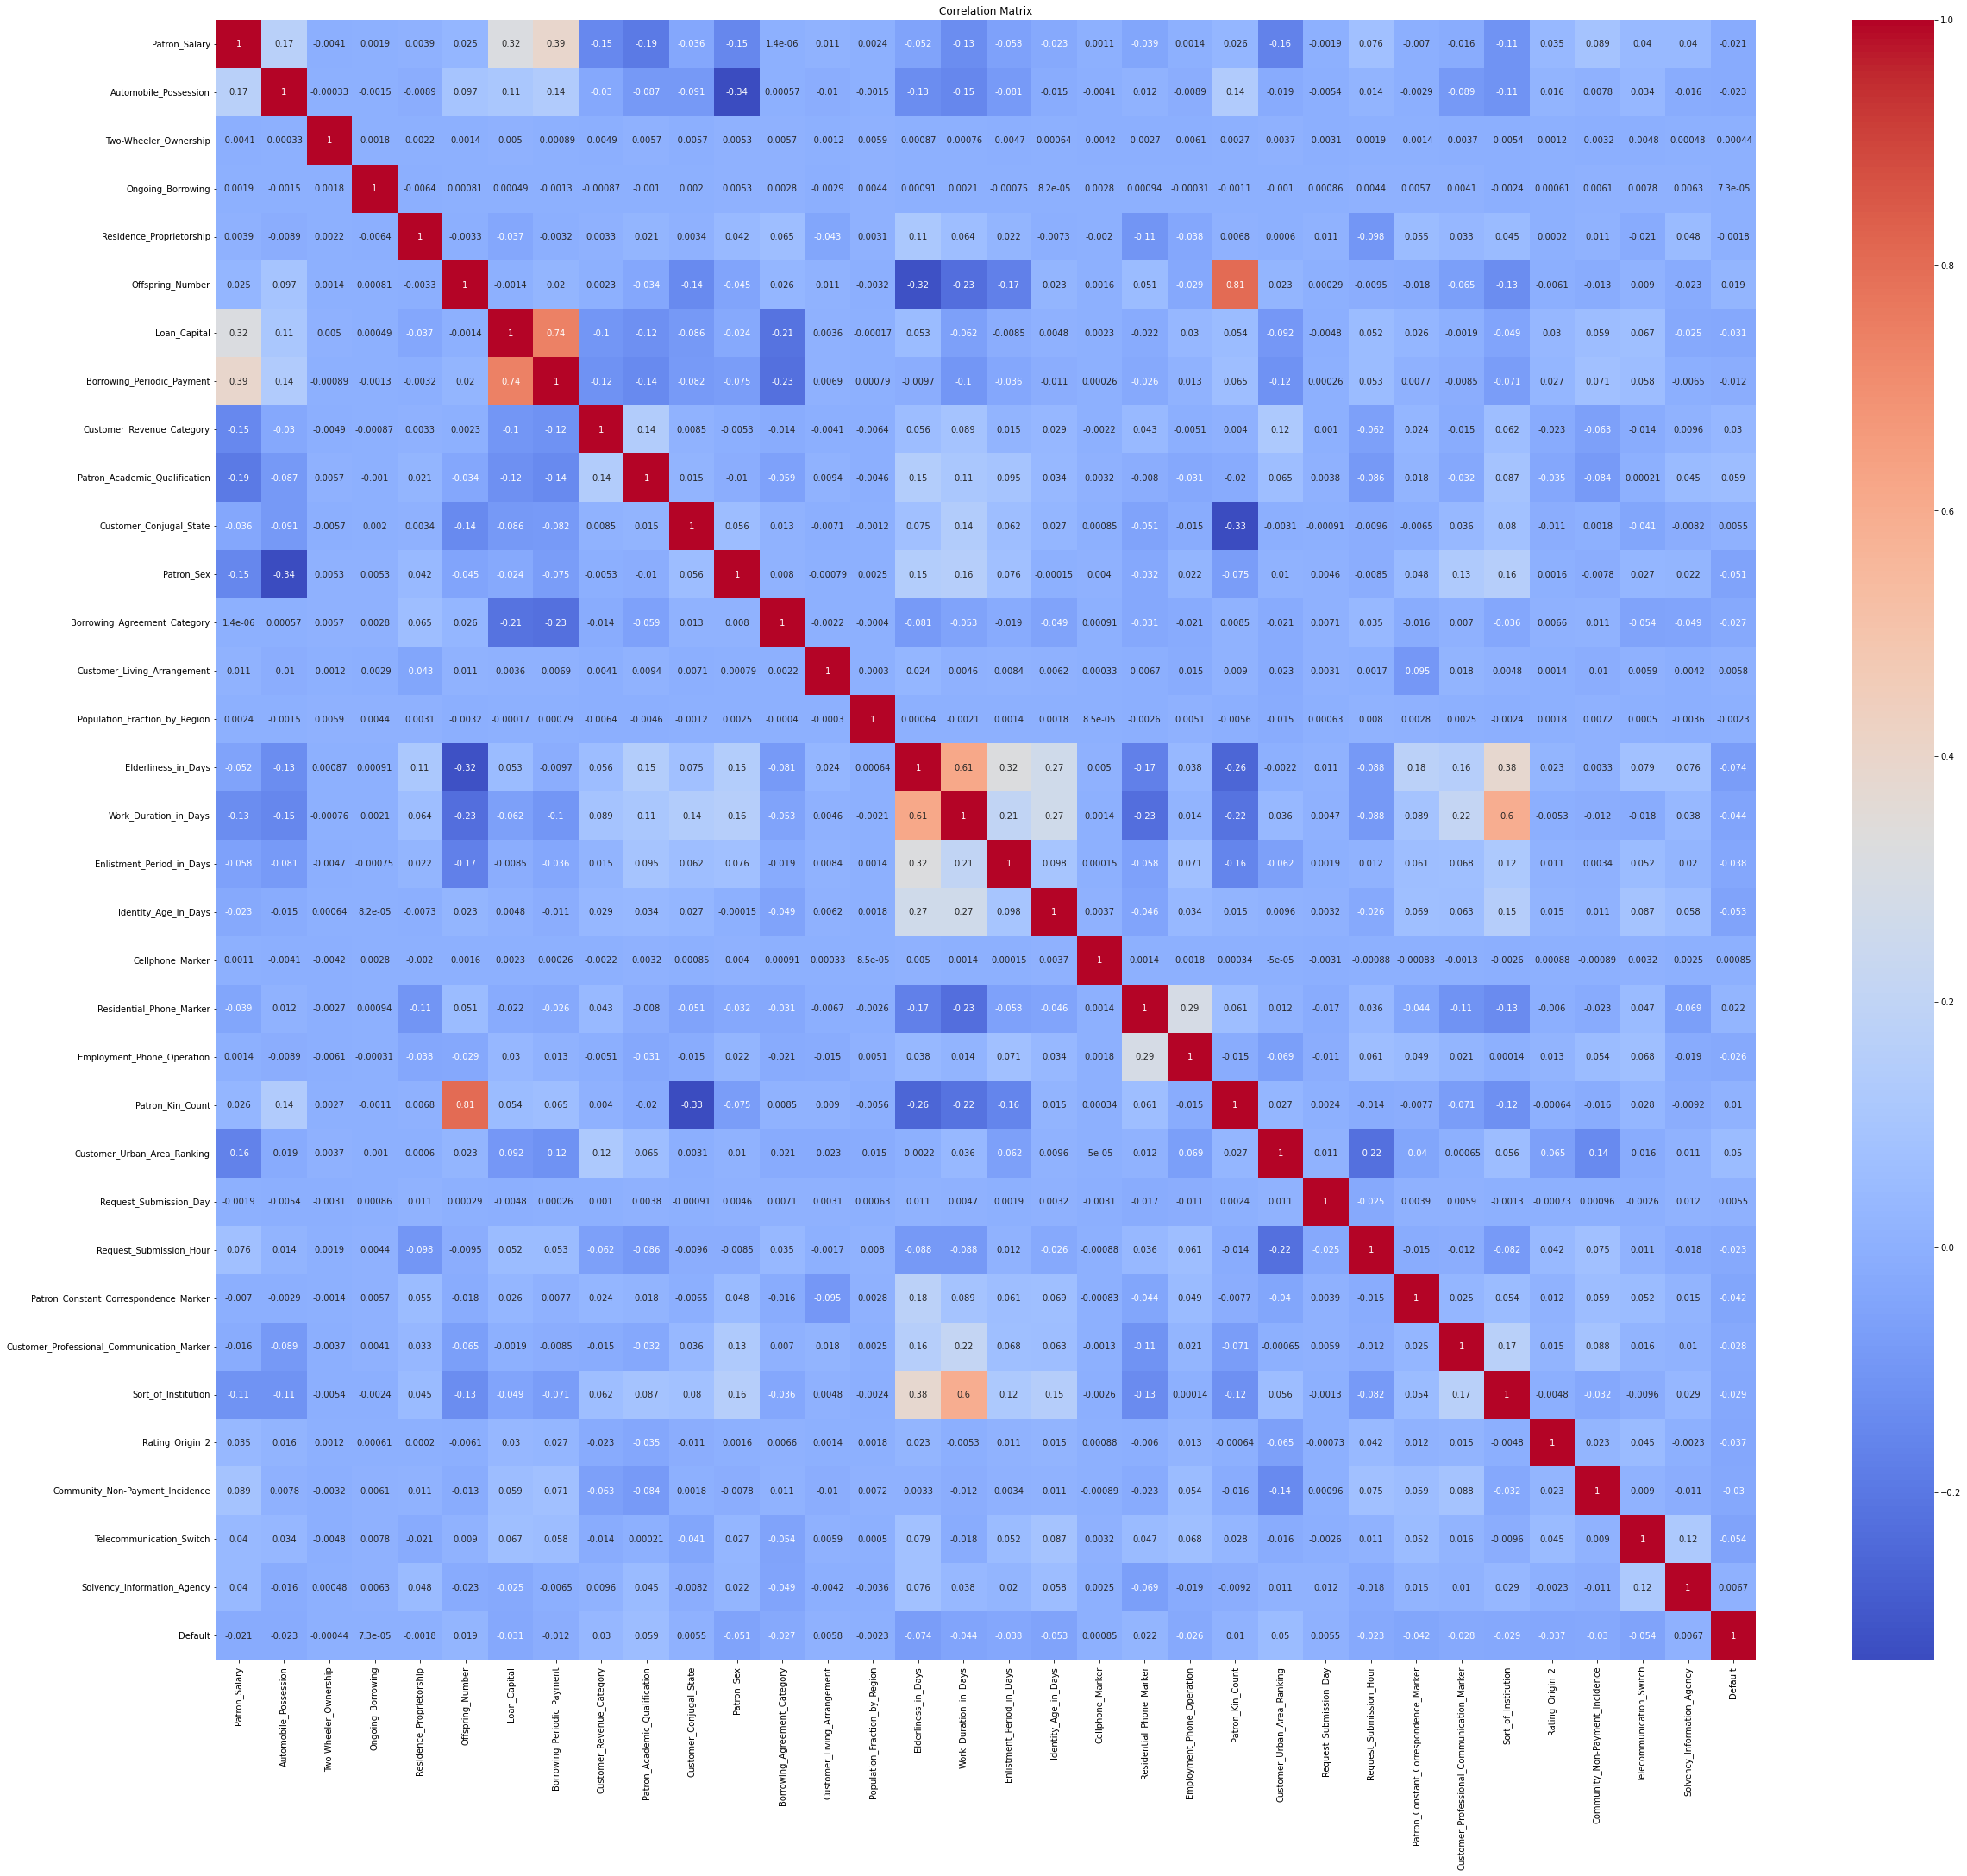

In [209]:
plt.figure(figsize=(40, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [240]:
df = df.reset_index()

In [241]:
#Model Building
X = df.drop('Default', axis=1) 
y = df['Default']  

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
df.isnull().sum()

index                                         0
Patron_Salary                                 0
Automobile_Possession                         0
Two-Wheeler_Ownership                         0
Ongoing_Borrowing                             0
Residence_Proprietorship                      0
Offspring_Number                              0
Loan_Capital                                  0
Borrowing_Periodic_Payment                    0
Customer_Revenue_Category                     0
Patron_Academic_Qualification                 0
Customer_Conjugal_State                       0
Patron_Sex                                    0
Borrowing_Agreement_Category                  0
Customer_Living_Arrangement                   0
Population_Fraction_by_Region                 0
Elderliness_in_Days                           0
Work_Duration_in_Days                         0
Enlistment_Period_in_Days                     0
Identity_Age_in_Days                          0
Cellphone_Marker                        

In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment','Population_Fraction_by_Region', 'Elderliness_in_Days', 'Work_Duration_in_Days','Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Rating_Origin_2','Community_Non-Payment_Incidence', 'Telecommunication_Switch', 'Solvency_Information_Agency']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [245]:
df=df.astype('float64')

In [246]:
#Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [247]:
y_pred = rf_model.predict(X_test)

In [248]:
from sklearn.metrics import classification_report, accuracy_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9265550631872641
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     22425
         1.0       1.00      0.08      0.15      1947

    accuracy                           0.93     24372
   macro avg       0.96      0.54      0.56     24372
weighted avg       0.93      0.93      0.90     24372



In [249]:
y_tpred = rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_tpred)
print("Accuracy:", accuracy)
print(classification_report(y_train, y_tpred))

Accuracy: 0.9999384514381847
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89586
         1.0       1.00      1.00      1.00      7898

    accuracy                           1.00     97484
   macro avg       1.00      1.00      1.00     97484
weighted avg       1.00      1.00      1.00     97484



In [251]:
#Support Vector Machines
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [261]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9201132447070408
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     22425
         1.0       0.00      0.00      0.00      1947

    accuracy                           0.92     24372
   macro avg       0.46      0.50      0.48     24372
weighted avg       0.85      0.92      0.88     24372



D:\software\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\software\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\software\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [262]:
y_tpred = svm_model.predict(X_train)
accuracy = accuracy_score(y_train, y_tpred)
print("Accuracy:", accuracy)
print(classification_report(y_train, y_tpred))

Accuracy: 0.9189815764638299
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     89586
         1.0       0.00      0.00      0.00      7898

    accuracy                           0.92     97484
   macro avg       0.46      0.50      0.48     97484
weighted avg       0.84      0.92      0.88     97484



D:\software\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\software\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\software\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
